# Data Visulization

## Surface Plots i.e 3d surfaces like plane, gaussian, gradient descent bowl

In [8]:
from mpl_toolkits.mplot3d import Axes3D
# Use for running the code in terminal i.e save this file with .py extension and run to get actually 3-D images 
# and to have more details while rotating that images


import matplotlib.pyplot as plt
import numpy as np


a=np.array([1,2,3])
b=np.array([4,5,6,7])


a,b=np.meshgrid(a,b)
# Repeat "a" ,"b" number of times along the coloumns
# Repeat "b" ,"a" number of times along the Rows


print(a)
print(b)

# Now both the matrix have dimesion 4*3


# Using these two above matrix we can generate a 2-D surface in cartasian plane i.e by taking the x value 
# from "a" matrix and cooresponding "y" from b matrix they will match equally as both are 4*3 matrix


[[1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]]
[[4 4 4]
 [5 5 5]
 [6 6 6]
 [7 7 7]]


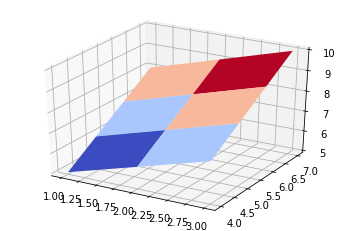

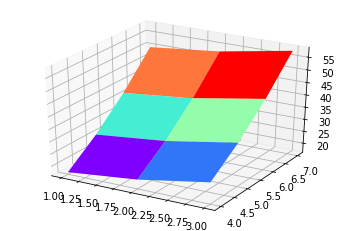

In [9]:
fig =plt.figure()
axes=fig.gca(projection='3d')
axes.plot_surface(a,b,a+b,cmap='coolwarm')
plt.show()

# by using a and b we are getting a 2-D plane so to make it 3-D we specify 3rd dimesion Z as a+b
# plot_surface has taken x ,y, and z value as parameter and color as coolwarm means Red indicating the high value 
# whereas blue indicating the low value



fig =plt.figure()
axes=fig.gca(projection='3d')
axes.plot_surface(a,b,a**2+b**2,cmap='rainbow')
plt.show()

(100,)


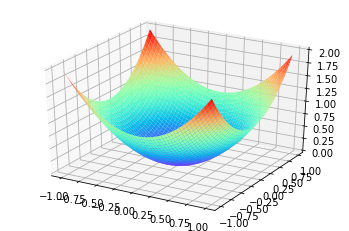

In [10]:
a=np.arange(-1,1,0.02)
b=a
print(a.shape)
a,b=np.meshgrid(a,b)
fig =plt.figure()
axes=fig.gca(projection='3d')
axes.plot_surface(a,b,a**2+b**2,cmap='rainbow')
plt.show()

### Countour Plots here we cut the above bowl by parallel planes and planes with same z value are depecited by same color

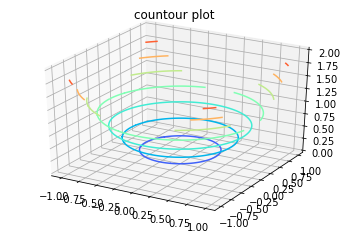

In [11]:
a=np.arange(-1,1,0.02)
b=a
a,b=np.meshgrid(a,b)
fig=plt.figure()
axes=fig.gca(projection='3d')
# Now this arrange function will give values from -1 to 1 with a gap of 0.02
axes.contour(a,b,a**2+b**2,cmap='rainbow')
plt.title('countour plot')
plt.show()

# Visulization on Linear Regression

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


x=pd.read_csv('./Linear_Regression_Data/Linear_X_Train.csv')
y=pd.read_csv('./Linear_Regression_Data/Linear_Y_Train.csv')


X=x.values
Y=y.values


u=X.mean()
std=X.std()
X=(X-u)/std




# yh is yhat i.e the estimated value of y

def hypo(x,theta):
    yh=theta[0]+theta[1]*x
    return yh




def gradient(X,Y,theta):
    m=X.shape[0]
    grad=np.zeros((2,))
    
    for i in range(m):
        yh=hypo(X[i],theta)
        grad[0]+=(yh-Y[i])
        grad[1]+=(yh-Y[i])*X[i]
    return grad/m
    # This division by m will divide both the values grad[0] and grad[1]



def error(X,Y,theta):
    m=X.shape[0]
    total_error=0.0
    
    for i in range(m):
        yh=hypo(X[i],theta)
        total_error+=(Y[i]-yh)**2
        # We are taking the square value instead of mod because this makes our function differnciable
        #i.e we are basically calculating mean squared error
    return total_error/m


def grad_des(X,Y,learn_rate=0.1,max_step=100):
    # np.zeros((2,)) it means we have a numpy array of two zeros
    theta=np.zeros((2,))
    error_list=[]
    theta_list=[]
    
    
    for i in range(max_step):
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)
        error_list.append(e)
        theta_list.append((theta[0],theta[1]))
        
        
        theta[0]=theta[0]-(learn_rate*grad[0])
        theta[1]=theta[1]-(learn_rate*grad[1])
        
    return theta,error_list,theta_list




theta,error_list,theta_list=grad_des(X,Y)

print(theta)


[ 0.6838508  79.90361453]


### Now we will visualize that the loss funtion in gradient descent i.e (J) or error function is actually a bowl shape curve

(80, 80)
(80, 80)


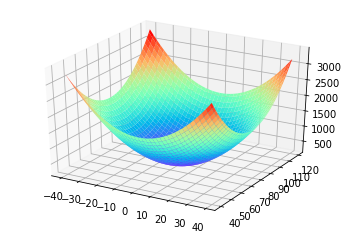

In [24]:
# Now generate some random values of theta[0] and theta[1] around 0.68 and 79.9 respectively 

T0=np.arange(-40,40,1)
T1=np.arange(40,120,1)

T0,T1=np.meshgrid(T0,T1)

print(T0.shape)

J=np.zeros(T0.shape)


for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        
        # We will be calculating for all the values of X in a single i.e for all the "m" where m=X.shape[0]
        # we know error is summation from 1 to m of (y-yh)**2
        
        # Here calculating y_ for all the values of X
        # Here T1 and T0 are acting as theta[1] and theta[0]
        
        y_=T1[i,j]*X+T0[i,j]
        J[i,j]=np.sum((y-y_)**2)/y.shape[0]

print(J.shape)
        

fig=plt.figure()
axes=fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()




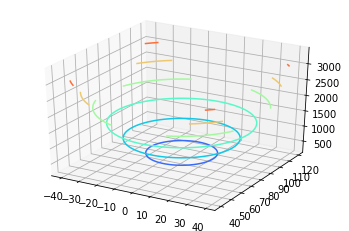

In [25]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()


# Now visualizing theta list i.e changes in theta

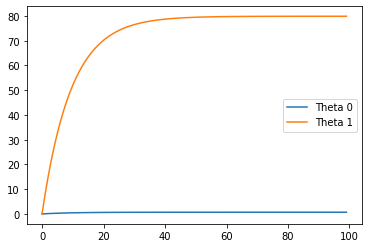

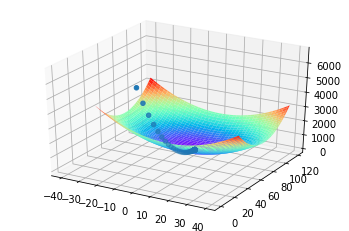

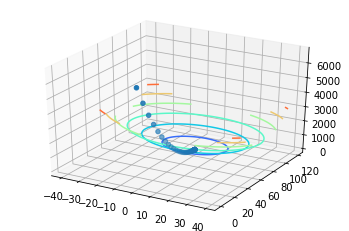

In [28]:
# Converting theta list to numpy array

theta_list=np.array(theta_list)
plt.plot(theta_list[:,0],label="Theta 0")
plt.plot(theta_list[:,1],label="Theta 1")
plt.legend()
plt.show()

# We can see that changes in theta are very less almost straight line i.e basically theta 0 is intercept




fig=plt.figure()
axes=fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()


fig=plt.figure()
axes=fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

### 2-D contour

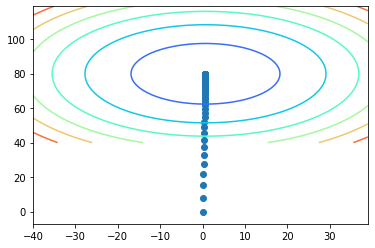

In [29]:
plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1])
plt.show()

# Interactive plot

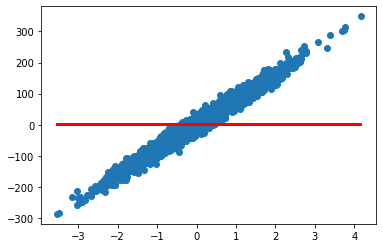

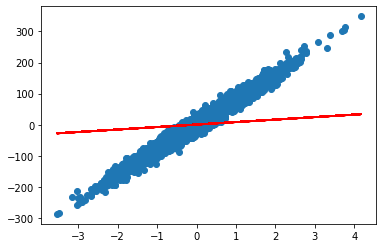

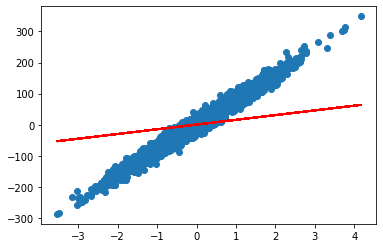

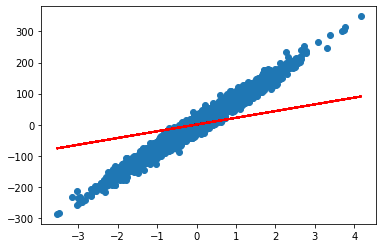

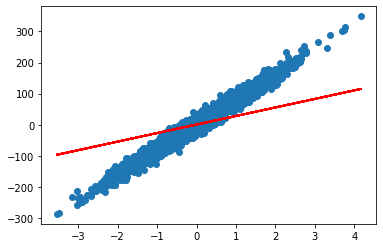

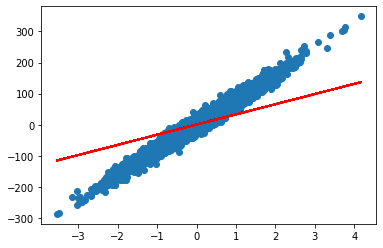

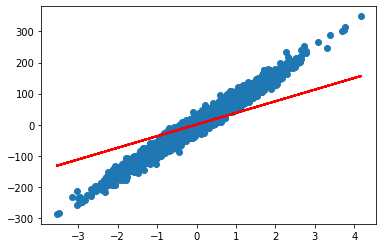

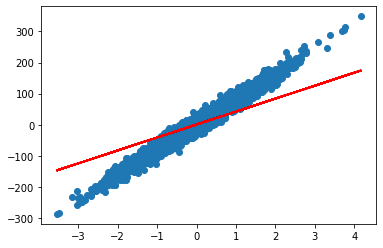

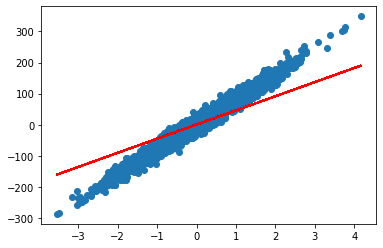

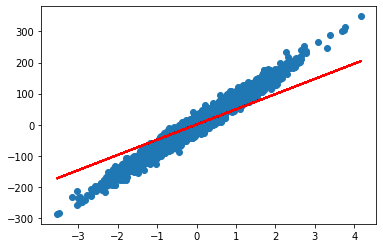

<Figure size 432x288 with 0 Axes>

In [32]:
# Saving numpy array to a numpy file 
np.save("New_theta_file.npy",theta_list)


theta=np.load("New_theta_file.npy")


T0=theta[:,0]
T1=theta[:,1]

# ion means interactive mode on
plt.ion()



# We have done 10 iteration but with around 50 iteration we can see the perfect line due to Presentation reasons
# we are doing only 10 iterations

for i in range(10):
    y_=T1[i]*X+T0
    plt.scatter(X,Y)
    plt.plot(X,y_,'red')
    plt.draw()
    # Pause the graph for 1 sec
    plt.pause(1)
    # Destroy the last object
    plt.clf()
    
    


# MULTIVARIATE LINEAR REGRESSION


### Predicting the price of house with multiple features

In [1]:
# sklearn library contains common datasets that are usually used in machine learning 
from sklearn.datasets import load_boston


#Object name boston is created and data is loaded into it
boston=load_boston()



# Syntax to work with sklearn dataset learn it
X=boston.data
Y=boston.target


# X is a mtrix and Y is a vector
print(X.shape)
print(Y.shape)

# We have 506 examples and each example have 13 features
print(boston.feature_names)


(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [3]:
# This is for description of boston dataset
# print(boston.DESCR)



# examples of description are

# - CRIM    per capita crime rate by town
# - ZN      proportion of residential land zoned for lots over 25,000 sq.ft.
# - INDUS   proportion of non-retail business acres per tow

In [11]:
# Visualizing the data

import pandas as pd
dfx=pd.DataFrame(X)
print(dfx.head(n=2))
print('\n')


dfx.columns=boston.feature_names
print(dfx.head(n=3))

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   

      11    12  
0  396.9  4.98  
1  396.9  9.14  


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  


In [9]:
dfx.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [13]:
# We can see that this data is not normalize so we can do normaization before applying our ML model
# i.e now each feature must have 0 mean and unit varience
# For each coloumn we will find the mean and varience in table 1 so total we have now 13 mean and 13 varience
# np.mean(X) This would give us the mean of entire 2-D matrix but we want mean across all the 13 coloumns of table 1
# So np.mean(X,axis=0) , gives out  the mean accros all the coloumns 
# And axis =1 --> mean across all the rows



import numpy as np
u=np.mean(X,axis=0)
print(u.shape)
std=np.std(X,axis=0)
X=(X-u)/std


# See first 4 rows of the Normalized Data Frame
pd.DataFrame(X[:4,:]).head()

(13,)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517


In [11]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.787437e-17,-6.343191e-16,-2.682911e-15,4.701992e-16,2.490322e-15,-1.145230e-14,-1.407855e-15,9.210902e-16,5.441409e-16,-8.868619e-16,-9.205636e-15,8.163101e-15,-3.370163e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


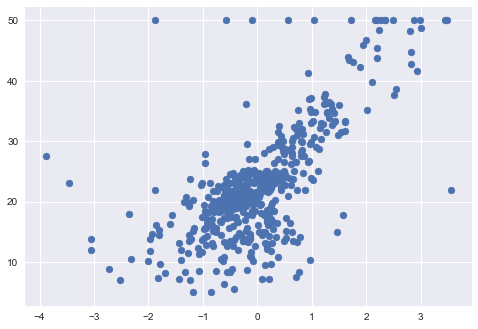

In [15]:
# Now Say lets visulaize the value of Y i.e output with say X[5] i.e out of 13 feautures we are only seeing that
# that how with 5th feature is effecting the output

import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.scatter(X[:,5],Y)
plt.show()

# We can see that the graph is actually not linear but may with 13 features it will be linear 
# but we dont have 13 dimesions to show that

## Now applying the actual Algorithm

In [12]:
# We have to add the dummy coloumn of 1 in the X matrix i.e now we will have X0 features and all the entries of that 
# would be 1

# Dont run this block again and again as it will then continue to add ones coloumns again and again
print(X.shape)

# Creating a numpy array of X.shape[0] rows and 1 cols

ones=np.ones((X.shape[0],1))
print(ones.shape)
X=np.hstack((ones,X))
print(X.shape)

(506, 13)
(506, 1)
(506, 14)


In [13]:
# Now we have n+1 number cols i.e 14 cols for 13 features
# First coloumn for dummy 1 i.e for X0


print(X[:4,:4])

[[ 1.         -0.41978194  0.28482986 -1.2879095 ]
 [ 1.         -0.41733926 -0.48772236 -0.59338101]
 [ 1.         -0.41734159 -0.48772236 -0.59338101]
 [ 1.         -0.41675042 -0.48772236 -1.30687771]]


In [28]:
print(X.shape)
print(X[0].shape)
print(X[0].shape[0])
print(X[0])

(506, 13)
(13,)
13
[-0.41978194  0.28482986 -1.2879095  -0.27259857 -0.14421743  0.41367189
 -0.12001342  0.1402136  -0.98284286 -0.66660821 -1.45900038  0.44105193
 -1.0755623 ]


#### Notation used below
#### X - Matrix ( m x n)
####  x - Vector (Single Example with n features)

In [14]:

def hypothesis(x,theta):
    y_ = 0.0
    n = x.shape[0]
    for i in range(n):
        y_  += (theta[i]*x[i])
    return y_


def error(X,y,theta):
    e = 0.0
    m = X.shape[0]
    
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        e += (y[i] - y_)**2
        
    return e/m



# In gradient X is a matrix and y is a vector

def gradient(X,y,theta):
    m,n = X.shape
    
    grad = np.zeros((n,))
    
    #  for all values of j
    #  j varies from 1 to 13
    #  For every j gradient needs to be computed
    #  i.e for every feature(1 to 13 ) we are going to every example(i. 506 rows) and computing gradient
    
    for j in range(n):
        for i in range(m):
            y_ = hypothesis(X[i],theta)
            grad[j] += (y_ - y[i])*X[i][j]
    # Out of the loops
    return grad/m

def gradient_descent(X,y,learning_rate=0.1,max_epochs=300):
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_epochs):
        e = error(X,y,theta)
        error_list.append(e)
        
        # Gradient Descent
        grad = gradient(X,y,theta)
        for j in range(n):
            theta[j] = theta[j] - learning_rate*grad[j]
        
    return theta,error_list


theta,error_list = gradient_descent(X,Y)
print(theta)

[ 2.25328063e+01 -9.03091692e-01  1.03815625e+00  1.53477685e-02
  6.99554920e-01 -2.02101672e+00  2.70014278e+00 -1.93085233e-03
 -3.10234837e+00  2.34354753e+00 -1.72031485e+00 -2.04614394e+00
  8.47845679e-01 -3.73089521e+00]


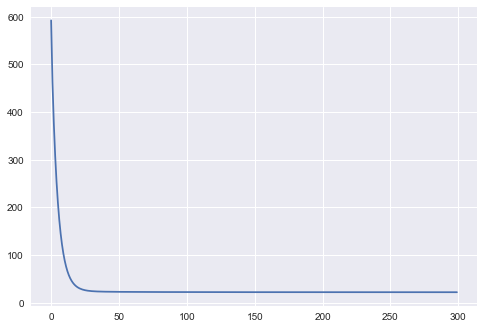

In [15]:
plt.style.use("seaborn")
plt.plot(error_list)
plt.show()

# Calculating the run time of algorithm

In [16]:
import time
start=time.time()
theta,error_list= gradient_descent(X,Y)
end=time.time()
print("time taken is",end-start)

time taken is 26.665950059890747


### Not a very good time as we only have 506 data set as 26 second ont good for 506 *13 matrix

# Predicting the R2 score

In [17]:
# Calculating the predicted value by our estimated theta
yh=[]

m=X.shape[0]
for i in range(m):
    pred=hypothesis(X[i],theta)
    yh.append(pred)    
# Now converting yh to numpy array
yh=np.array(yh)




def r2_score(y,yh):
    num=np.sum((y-yh)**2)
    den=np.sum((y-y.mean())**2)
    score=1-(num/den)
    return score*100

r2_score(Y,yh)

74.04541323942743

### Not very good but a descent score

# Optimizing code using vectorization 

### i.e avoid loops that make our execution slow and replace them with np.sum or np.dot etc

In [34]:

# X is m*n matrix and theta is n*1 matrix
# Imagine this one by how actual multiplication will occur

def hypothesis(X,theta):
    return np.dot(X,theta)



def error(X,y,theta):
    error=0.0
    y_=hypothesis(X,theta)
    
    # now here y_ is a complete vector
    e=np.sum((y-y_)**2)
    
    m=X.shape[0]
    return e/m


def gradient(X,y,theta):
    y_=hypothesis(X,theta)
    
    # Multiplying n*m and m*1
    # So shape of gradient is n*1
    
    
    grad=np.dot(X.T,(y_-y))
    m=X.shape[0]
    
    return grad/m


    
    
def gradient_descent(X,y,learning_rate=0.1,max_iters=300):
    n=X.shape[1]
    theta=np.zeros((n,))
    
    error_list=[]
    
    for i in range(max_iters):
        e=error(X,y,theta)
        error_list.append(e)
        
        grad=gradient(X,y,theta)
        theta=theta-learning_rate*grad
    
    return theta,error_list

import time
start=time.time()
theta,error_list= gradient_descent(X,Y)
end=time.time()

print("Time Taken is ",end-start)


theta
    

    
    
    
    
 # Now it is 0.023 sec ie a very good optimization previously it was 26 seconds   

Time Taken is  0.023647069931030273


array([-9.03091692e-01,  1.03815625e+00,  1.53477685e-02,  6.99554920e-01,
       -2.02101672e+00,  2.70014278e+00, -1.93085233e-03, -3.10234837e+00,
        2.34354753e+00, -1.72031485e+00, -2.04614394e+00,  8.47845679e-01,
       -3.73089521e+00])

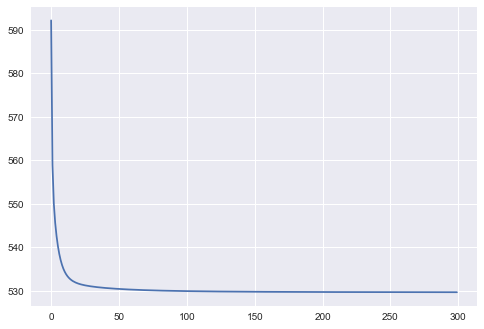

In [32]:
plt.plot(error_list)